**Amara Nyanzi 667762**

Decision Tree Assignment

In [1]:
%pip install scikit-learn #install sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ERROR: Invalid requirement: '#install'


Note: you may need to restart the kernel to use updated packages.


In [2]:
data= pd.read_csv('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/cleantrain.csv')
# Importing already cleaned dataset from previous class

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    int64  
 8   Q            889 non-null    int64  
 9   S            889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.6 KB


In [4]:
data.sample(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
341,343,0,2,28.0,0,0,13.0000,1,0,1
44,45,1,3,19.0,0,0,7.8792,0,1,0
48,49,0,3,37.0,2,0,21.6792,1,0,0
855,858,1,1,51.0,0,0,26.5500,1,0,1
556,558,0,1,37.0,0,0,227.5250,1,0,0
629,631,1,1,80.0,0,0,30.0000,1,0,1
847,850,1,1,37.0,1,0,89.1042,0,0,0
808,810,1,1,33.0,1,0,53.1000,0,0,1
85,87,0,3,16.0,1,3,34.3750,1,0,1
260,262,1,3,3.0,4,2,31.3875,1,0,1


In [5]:
data['Survived'] = data['Survived'].replace([1], 'Alive') #First replace all the 1's in Survived with Alive
data['Survived'] = data['Survived'].replace([0], 'Dead') #Second replace all the 0's in Survived with Dead
y = data['Survived'] #Define target variable y
y

0       Dead
1      Alive
2      Alive
3      Alive
4       Dead
       ...  
884     Dead
885    Alive
886     Dead
887    Alive
888     Dead
Name: Survived, Length: 889, dtype: object

In [6]:
pd.crosstab([data['male'],data['Pclass']], data['Survived']) #Most relevant Reference table produced showing genders(male/female)
#and ticket class(first/second/third) against the number of those dead and alive

Survived     Alive  Dead
male Pclass             
0    1          89     3
     2          70     6
     3          72    72
1    1          45    77
     2          17    91
     3          47   300

Building the DT

In [7]:
# 

In [8]:
# from sklearn import tree #import necessary

In [9]:
x= data.drop(['Survived','PassengerId','SibSp','Parch'],axis=1) #Define features to remove and features to keep in x variable

In [10]:
x #Display features choosen

,Pclass,Age,Fare,male,Q,S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
884,2,27.0,13.0000,1,0,1
885,1,19.0,30.0000,0,0,1
886,3,37.0,23.4500,0,0,1
887,1,26.0,30.0000,1,0,0


In [11]:
# Split the data into the necessary test and train sections
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state=101)  #Split the dataframe into 70% training data and 30% test data

In [12]:
import pydotplus
import graphviz
from IPython.display import Image #Necessary imports for data visualization

In [13]:
 #Tried to create a loop that varies max tree depth. Graphical Representation were too big to be output so each had to be calculated individually
values = range(3,8)     #Define range/number or iterations/ max_depth
many ={'clf'}
for dt in many:
  for i in values:
          #Iterate through to obtain fits and feature imporatances for each tree depth
    dt= DecisionTreeClassifier(criterion= 'entropy', max_depth = i) #Initialize a Decision Tree with varying max_depth

    r = dt.fit(X_train,y_train)   #r stores fitted model
    q = r.feature_importances_     #q retrive feature importances from fitted model and stores it
    print(r)                       #display fitted model
    print(q)                       #display feature #Define a function that takes in q as parameter

    dot_data =export_graphviz(dt,feature_names= X_train.columns, class_names= ['Dead','Alive'],filled = True, out_file= None)  # Provides a Graphviz
    #representation of a decision tree that can be exported in DOT format

    graph =pydotplus.graph_from_dot_data(dot_data) # Used to generate a graph from DOT format data. It takes a string in DOT format as an argument and returns
    #an object that represents the graph

    Image(graph.create_png()) #Creates a PNG image of previously defined graph and displays it


DecisionTreeClassifier(criterion='entropy', max_depth=3)
[0.18509964 0.10819497 0.0923162  0.61438919 0.         0.        ]
DecisionTreeClassifier(criterion='entropy', max_depth=4)
[0.18954021 0.11150314 0.18743497 0.51152168 0.         0.        ]


DecisionTreeClassifier(criterion='entropy', max_depth=5)
[0.16623824 0.18227155 0.19425496 0.44863546 0.         0.0085998 ]
DecisionTreeClassifier(criterion='entropy', max_depth=6)
[0.15081487 0.22614636 0.20822521 0.40701165 0.         0.00780192]
DecisionTreeClassifier(criterion='entropy', max_depth=7)
[0.13292165 0.27032978 0.23114998 0.35872232 0.         0.00687627]


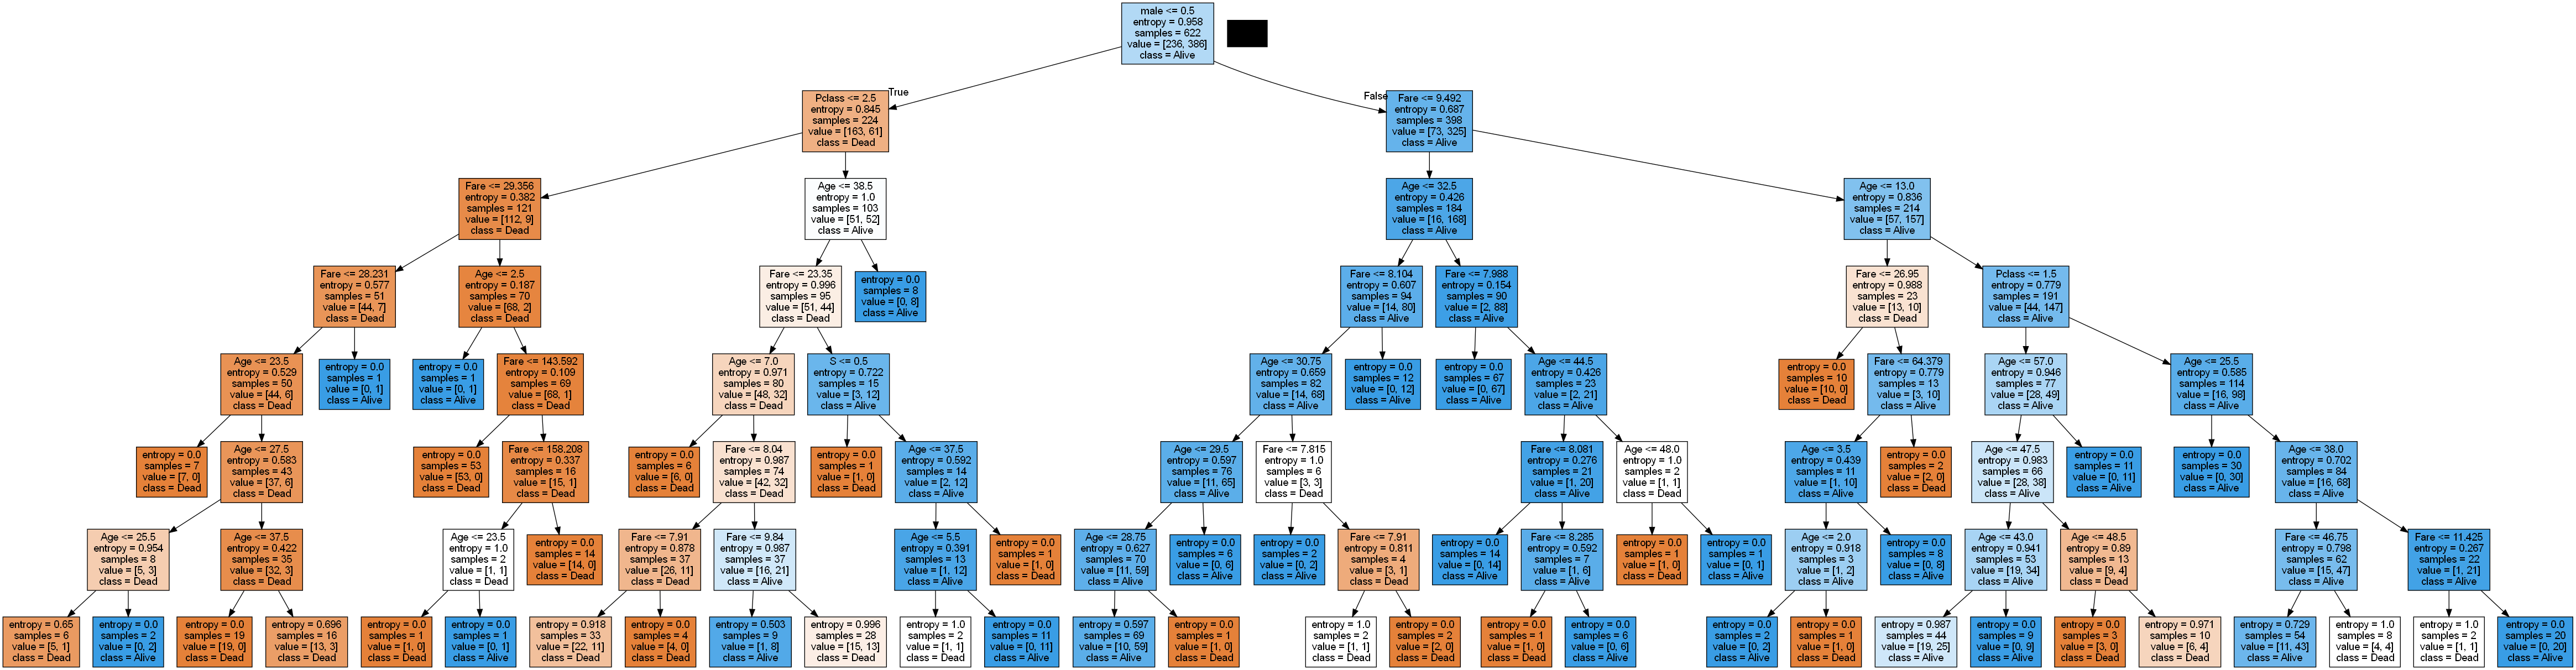

In [14]:
Image(graph.create_png()) #Returned from previous last iteration with max depth 7

Graphical Representations were too big to be output through iteration so each had to be calculated individually

**DT CLASSIFIER 3**

In [15]:
clf3= DecisionTreeClassifier(criterion= 'entropy', max_depth = 3).fit(X_train, y_train) #Initialize a Decision Tree with varying max_depth
q = clf3.feature_importances_     #q retrive feature importances from fitted model and stores it
print(clf3)
print(q)


DecisionTreeClassifier(criterion='entropy', max_depth=3)
[0.18509964 0.10819497 0.0923162  0.61438919 0.         0.        ]


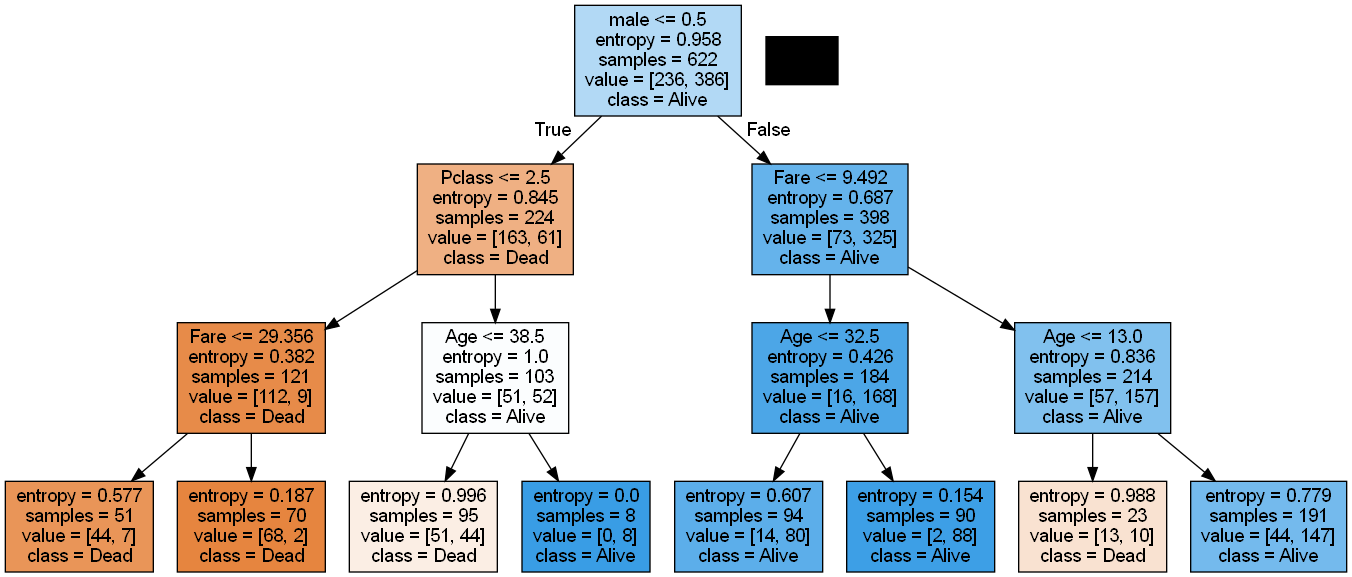

In [16]:
dot_data =export_graphviz(clf3,feature_names= X_train.columns, class_names= ['Dead','Alive'],filled = True, out_file= None)
dot_data
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**DT CLASSIFIER 4**

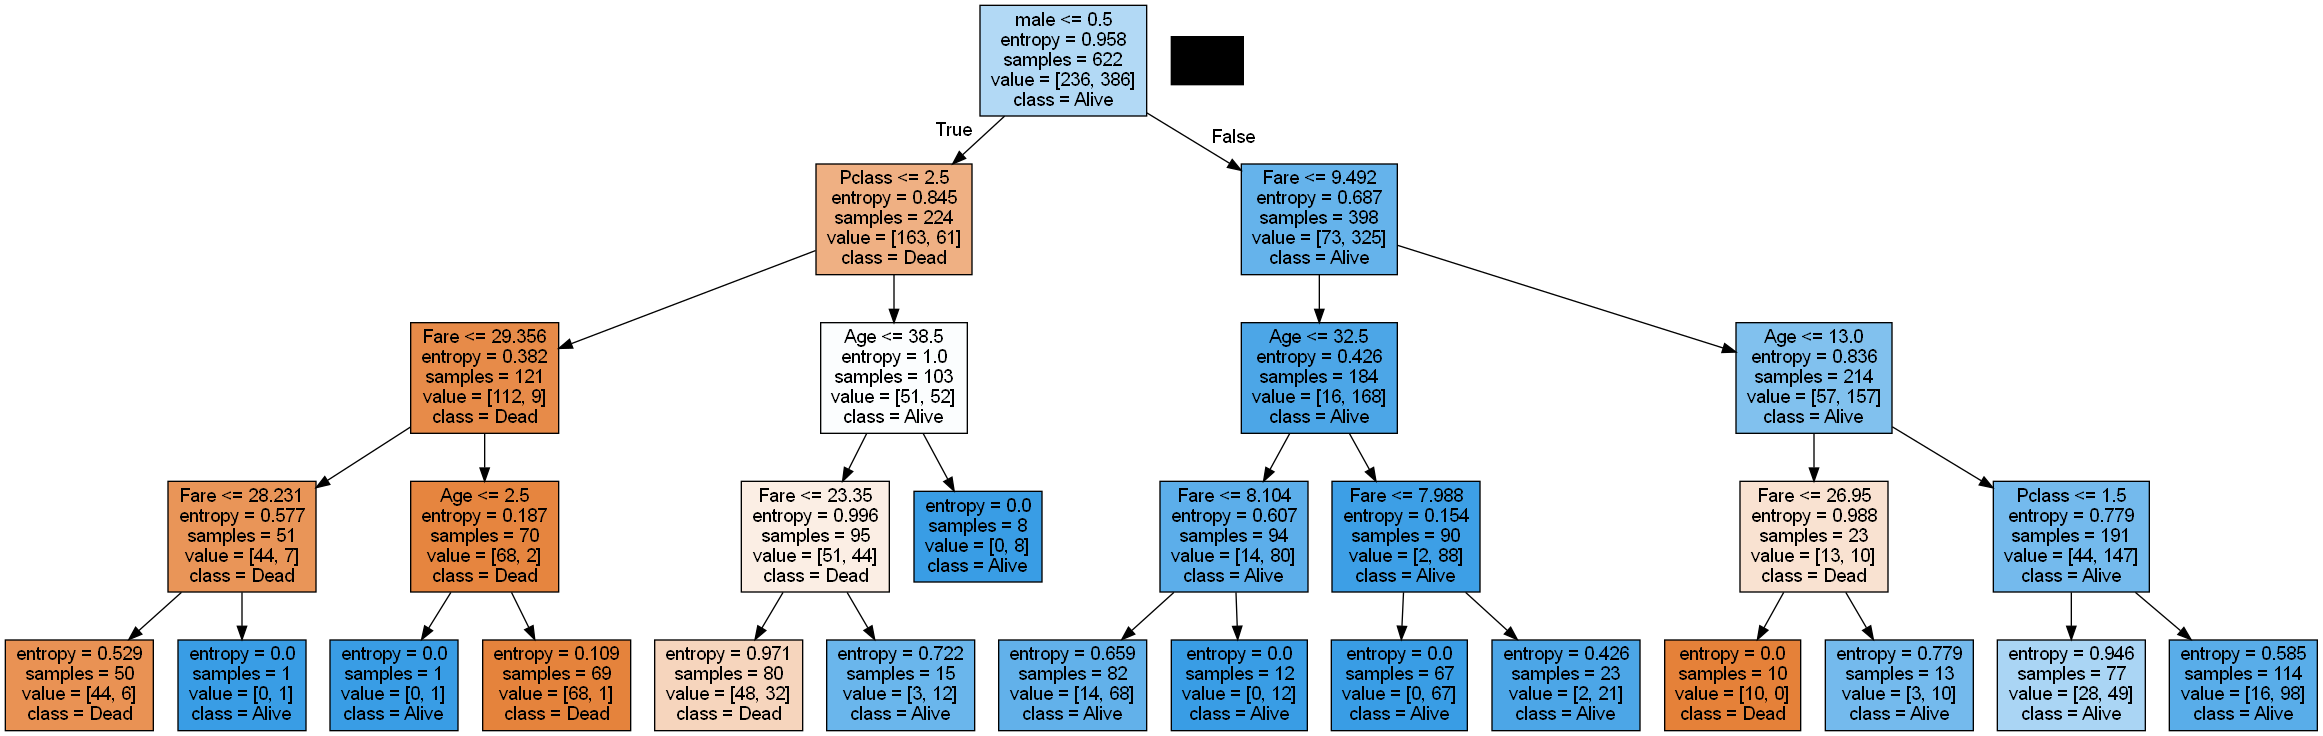

In [17]:
clf4= DecisionTreeClassifier(criterion= 'entropy', max_depth = 4).fit(X_train, y_train) #Initialize a Decision Tree fitted with depth of 4
dot_data =export_graphviz(clf4,feature_names= X_train.columns, class_names= ['Dead','Alive'],filled = True, out_file= None) # Provides a Graphviz
#representation of a decision tree that can be exported in DOT format
dot_data
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**DT CLASSIFIER 5**

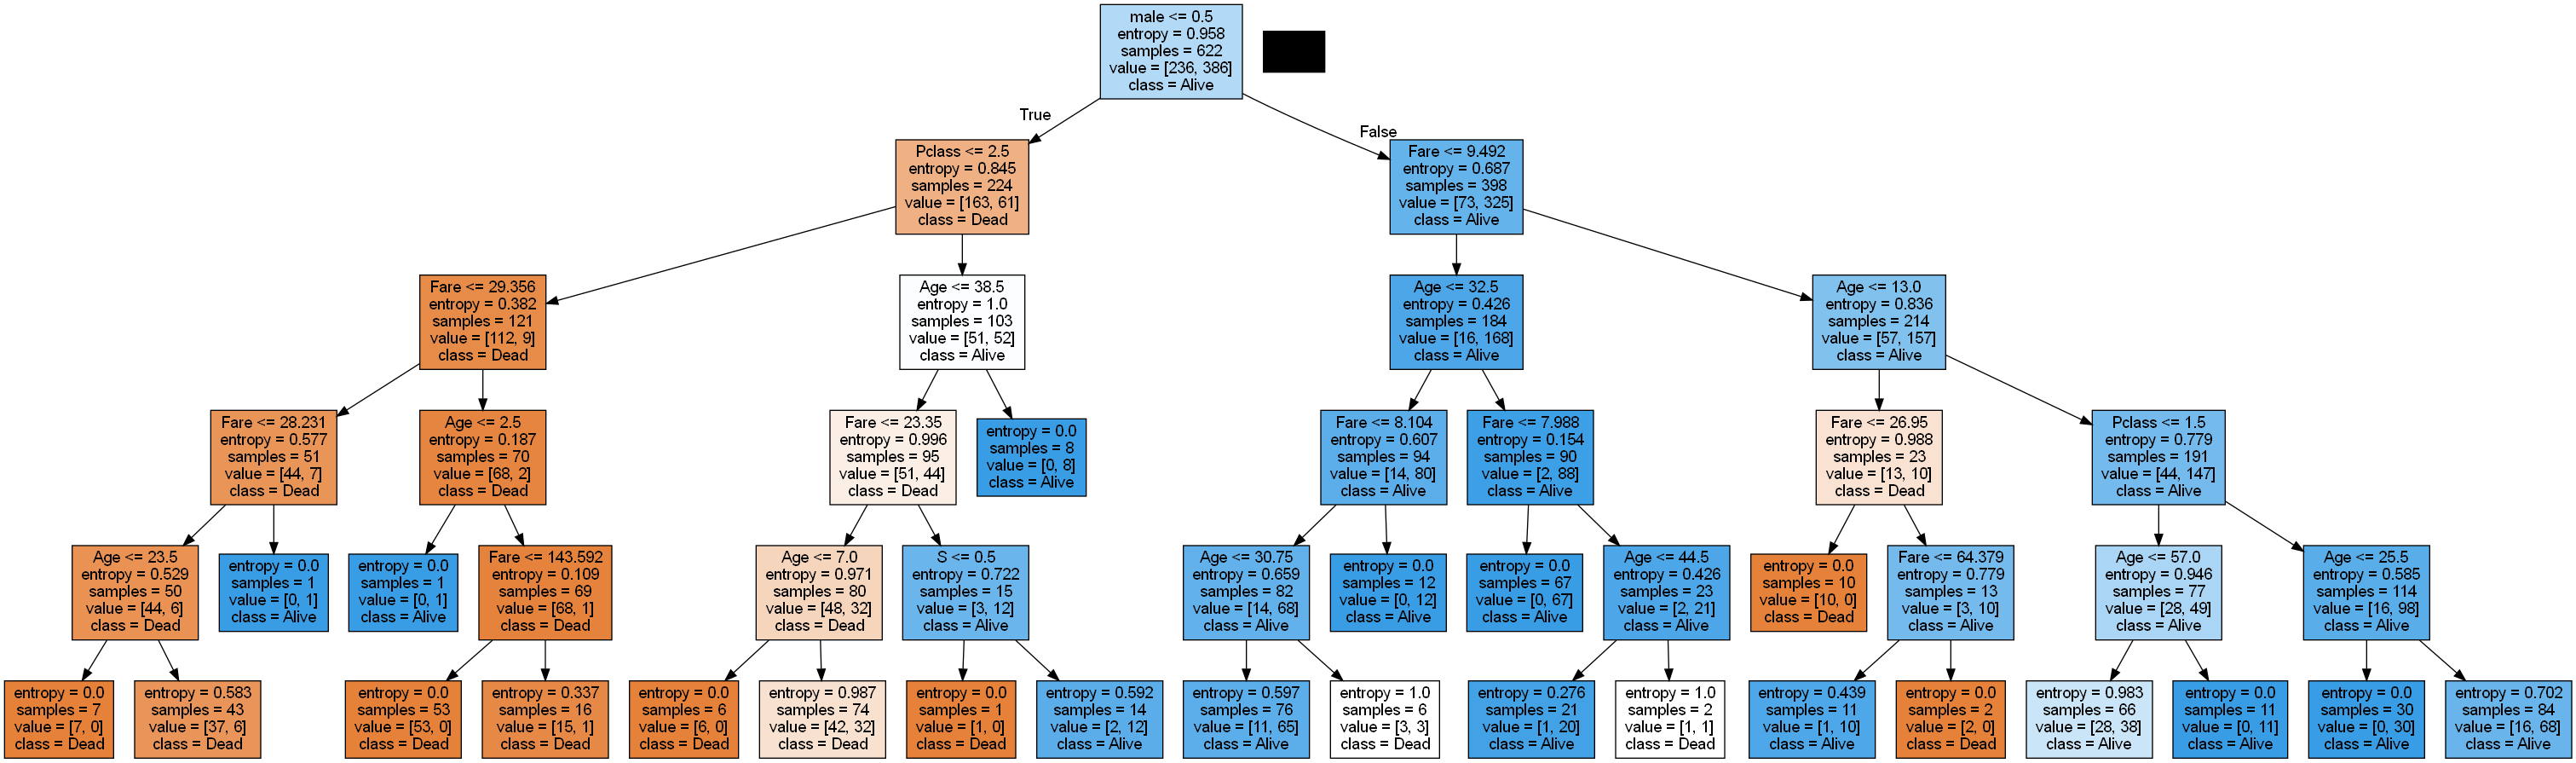

In [18]:
clf5= DecisionTreeClassifier(criterion= 'entropy', max_depth = 5).fit(X_train, y_train) #Initialize a Decision Tree fitted with depth of 5
dot_data =export_graphviz(clf5,feature_names= X_train.columns, class_names= ['Dead','Alive'],filled = True, out_file= None) # Provides a Graphviz
#representation of a decision tree that can be exported in DOT format
dot_data
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**DT CLASSIFIER 6**

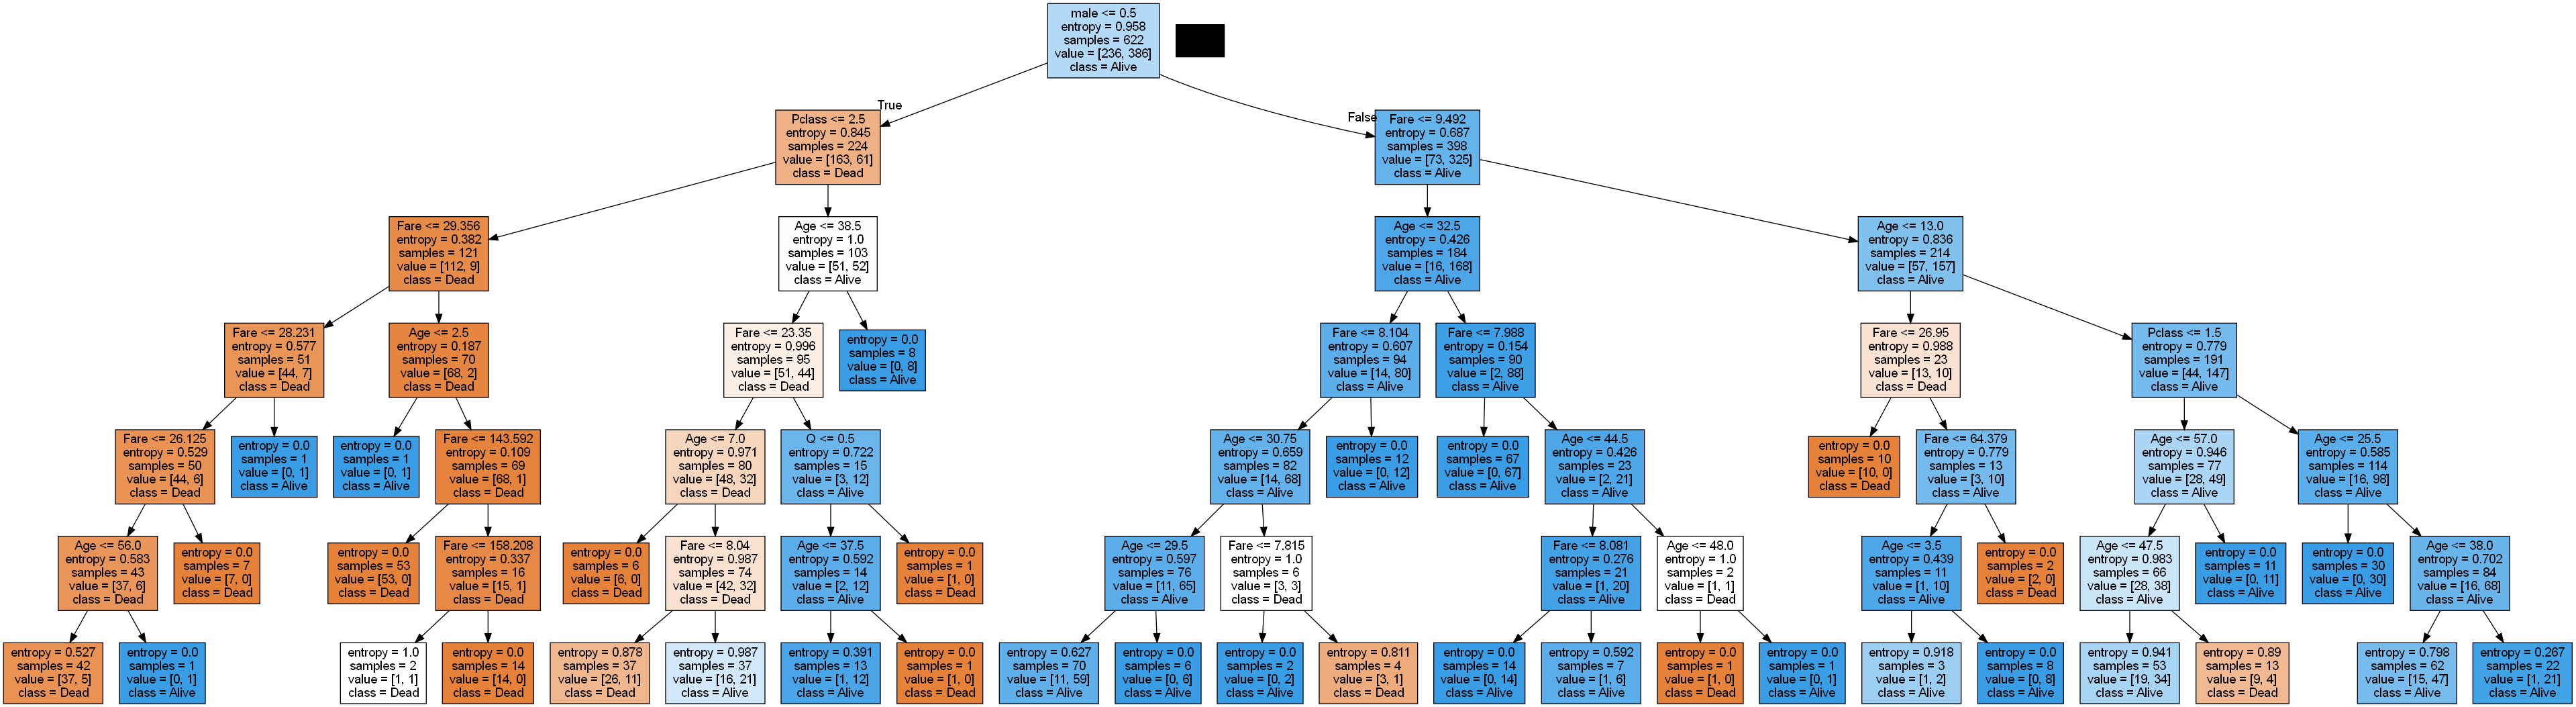

In [19]:
clf6= DecisionTreeClassifier(criterion= 'entropy', max_depth = 6).fit(X_train, y_train) #Initialize a Decision Tree fitted with depth of 6
dot_data =export_graphviz(clf6,feature_names= X_train.columns, class_names= ['Dead','Alive'],filled = True, out_file= None) # Provides a Graphviz
#representation of a decision tree that can be exported in DOT format
dot_data
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**TESTING**

In [20]:
X_test

,Pclass,Age,Fare,male,Q,S
510,3,37.0,8.05,1,0,1
612,3,37.0,7.75,1,1,0
614,2,24.0,65.00,0,0,1
336,1,41.0,134.50,0,0,0
717,3,37.0,15.50,1,1,0
...,...,...,...,...,...,...
791,3,37.0,69.55,0,0,1
827,3,37.0,7.75,1,1,0
731,2,37.0,0.00,1,0,1
668,1,37.0,52.00,0,0,1


In [21]:
pred4Y = clf4.predict(X_test) #Choosen DTClassifier with max depth of 4

In [22]:
pred4Y #Displaying predicted y values

array(['Dead', 'Dead', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Alive', 'Alive', 'Alive', 'Dead', 'Alive', 'Dead', 'Dead',
       'Alive', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead', 'Dead', 'Dead',
       'Alive', 'Dead', 'Dead', 'Alive', 'Alive', 'Dead', 'Alive',
       'Alive', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Alive', 'Alive', 'Dead', 'Alive', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead',
       'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead',
       'Alive', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead',
       'Alive', 'Alive', 'Dead', 'Alive', 'Dead', '

In [23]:
y_test #Displaying actual y values(truth)

510     Dead
612     Dead
614    Alive
336    Alive
717     Dead
       ...  
791     Dead
827    Alive
731     Dead
668    Alive
633     Dead
Name: Survived, Length: 267, dtype: object

In [24]:
# from sklearn.metrics import accuracy_score

In [25]:
print('The accuracy of the model is %.2f'%(accuracy_score(y_test, pred4Y))) #Accuracy for DTClassifier with max depth of 4
#0.82 accuracy is 82% accuracy

The accuracy of the model is 0.82


In [26]:
# pred7Y = clf.predict(X_test) #Choosen DTClassifier with max depth of 7

In [27]:
# pred7Y

In [28]:
# print('The accuracy of the model is %.2f'%(accuracy_score(y_test, pred7Y))) #Accuracy for DTClassifier with max depth of 7
#In this example the accuracy seems to have decreased to 78% even though max depth of true increased.

In conclusion, Optimality is always best when picking the DT Classifier with the best accuracy. Altering factors such as random state and max depth as well as criterion greatly affects tree prediction precision

In [29]:
# import dill as pickle
import json
# from sklearn.tree import export_text
import pickle

# Convert the tree to text feature_names=data['Pclass','Age','Fare','male','Q','S']
# tree_text = export_text(clf4, feature_names=list(X_train.columns))

# with open('model_pickle.json','w') as file:
#     json.dump({'tree':tree_text},file)

with open('model_pickle.pkl','wb') as file:
     pickle.dump(clf4,file)

In [30]:
# with open('model_pickle.json','r') as file:
#     model = json.load(file)
with open('model_pickle.pkl','rb') as file:
    model = pickle.load(file)

pred =model.predict(X_test)

In [31]:
pred

array(['Dead', 'Dead', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Alive', 'Alive', 'Alive', 'Dead', 'Alive', 'Dead', 'Dead',
       'Alive', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead', 'Dead', 'Dead',
       'Alive', 'Dead', 'Dead', 'Alive', 'Alive', 'Dead', 'Alive',
       'Alive', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Alive', 'Alive', 'Dead', 'Alive', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead',
       'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Dead', 'Dead', 'Dead',
       'Alive', 'Alive', 'Dead', 'Dead', 'Dead', 'Dead', 'Alive', 'Dead',
       'Alive', 'Alive', 'Dead', 'Alive', 'Dead', '